## Predicting Heart Disease using Machine Learning
This notebook looks into using various python-based machine learning and datascience libraries in an attempt to build a machine learning model capable to predict whether or not someone has a heart disease based on their medical attributes

I'm going to take the following approach to solve this problem -
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

### 1. Problem Defination
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

### 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### 3. Evaluation

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

### 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

`data_dictionary`


In [2]:
data_dictionary = {

'age' : 'Displays the age of the individual.',

'sex' : 'Displays the gender of the individual using the following format : 1 = male 0 = female',

'cp' :  'Chest-pain type displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic',

'trestbps' : 'Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.',

'chol' : 'Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)',

'fbs' : "Fasting Blood Sugar compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes",

'restecg' : 'Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy',

'thalach' : ' Fasting Blood Sugar displays the max heart rate achieved by an individual.',

'exang' : 'Exercise induced angina : 1 = yes 0 = no',

'oldpeak' :  'ST depression induced by exercise relative to rest: displays the value which is an integer or float.',

'slope' : 'Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart',

'ca' : 'Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.',

'thal' : 'Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising',

'target' : 'Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no'

}

### Preparing the Tools
We're going to use pandas, numpy and matplotlib for this data analysis and manipulation

In [39]:
# Importing all the tools we need

# Regular EDA and plotting libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
 
# Models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

### Load Data

In [4]:
df = pd.read_csv('./heart-disease.csv')
df.shape

(303, 14)

### Data Exploration (Explanatory Data Analysis)
The goal here is to understand the data thouroughly and become a subject matter expert on that.

1. What kind of Question(s) are you trying to solve? 
2. What kind of Data do we have and how do we treat different types? 
3. What is missing from the data and how to deal with it?
4. Where are the outliers and why should you care about them?  
5. How can you add/change/remove features to get more out of data

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

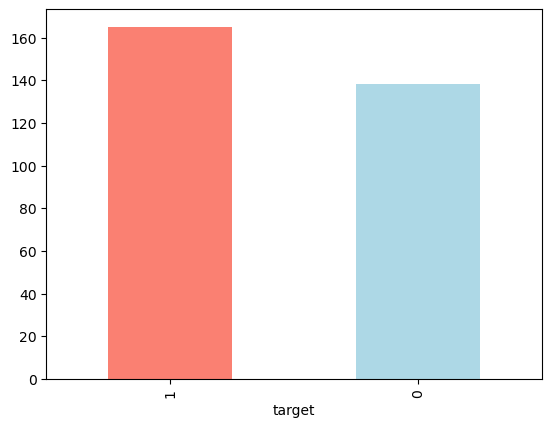

In [7]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);  # 1=Yes, 0=No

In [8]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
 age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##### Heart Disease Frequency according to Sex

In [10]:
df['sex'].value_counts()  # 1 = male, 0 = female

sex
1    207
0     96
Name: count, dtype: int64

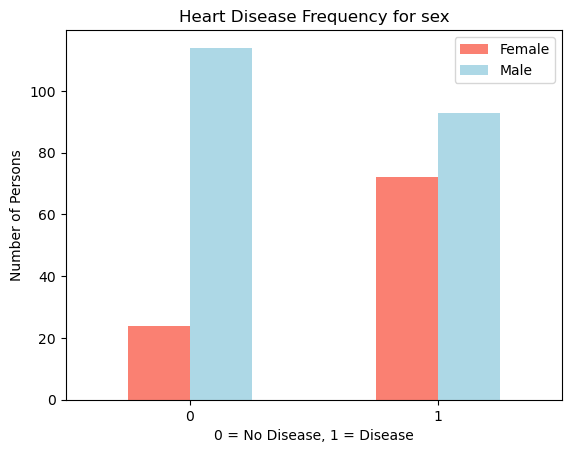

In [11]:
# Compare sex column with target column
pd.crosstab(df.target, df.sex).plot(kind='bar', color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Number of Persons')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

In [12]:
data_dictionary['sex']

'Displays the gender of the individual using the following format : 1 = male 0 = female'

#### Age vs Max heart rate for heart disease

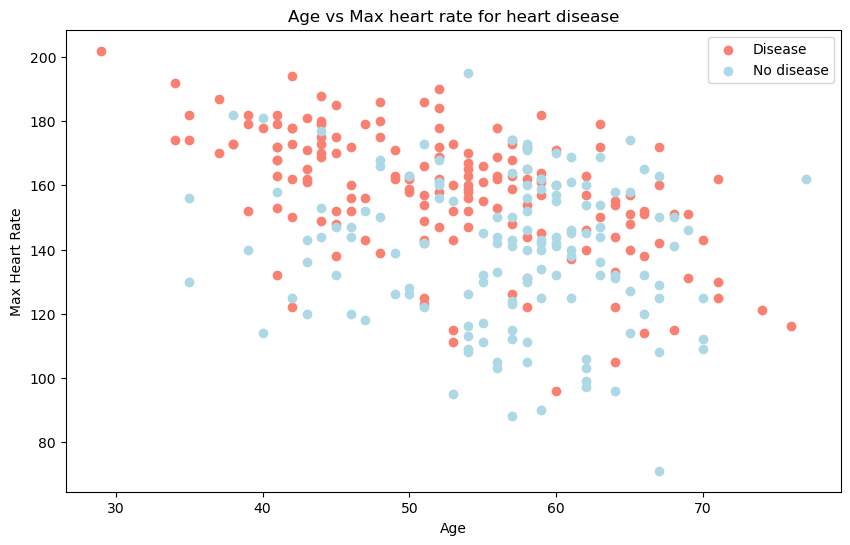

In [13]:
plt.figure(figsize=(10, 6))
# Scatter figure with positive examples (target = 1)
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color='salmon')
# Scatter figure with negative examples (target = 0)
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue')
# Adding some info
plt.title('Age vs Max heart rate for heart disease')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No disease'])

<Axes: ylabel='Frequency'>

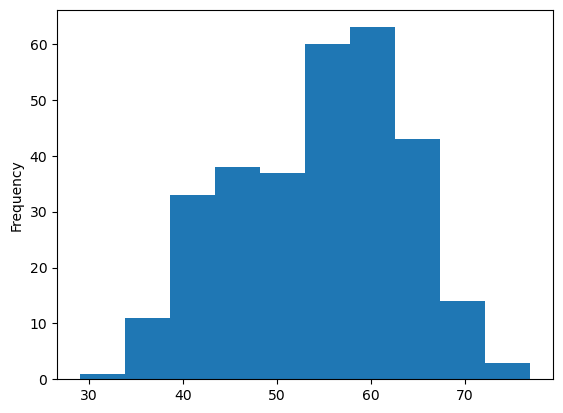

In [14]:
# Checking distribution of age column using a histogram
df.age.plot.hist()

#### Heart Disease frequency per chest pain type

In [15]:
data_dictionary['cp']

'Chest-pain type displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic'

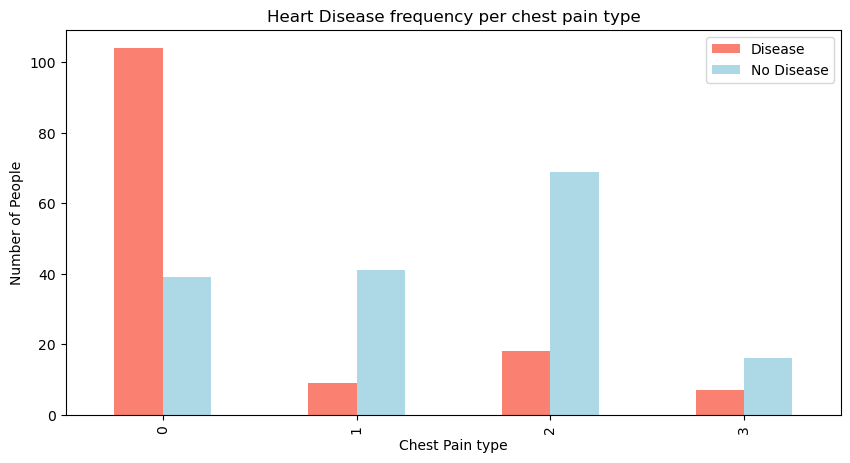

In [16]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,5), color=['salmon', 'lightblue'])
plt.title('Heart Disease frequency per chest pain type')
plt.xlabel('Chest Pain type')
plt.ylabel('Number of People')
plt.legend(['Disease', 'No Disease'])

In [17]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Negative Correlation = A relationship between two variable in which when one goes up, other goes down. For eg- More cp ->

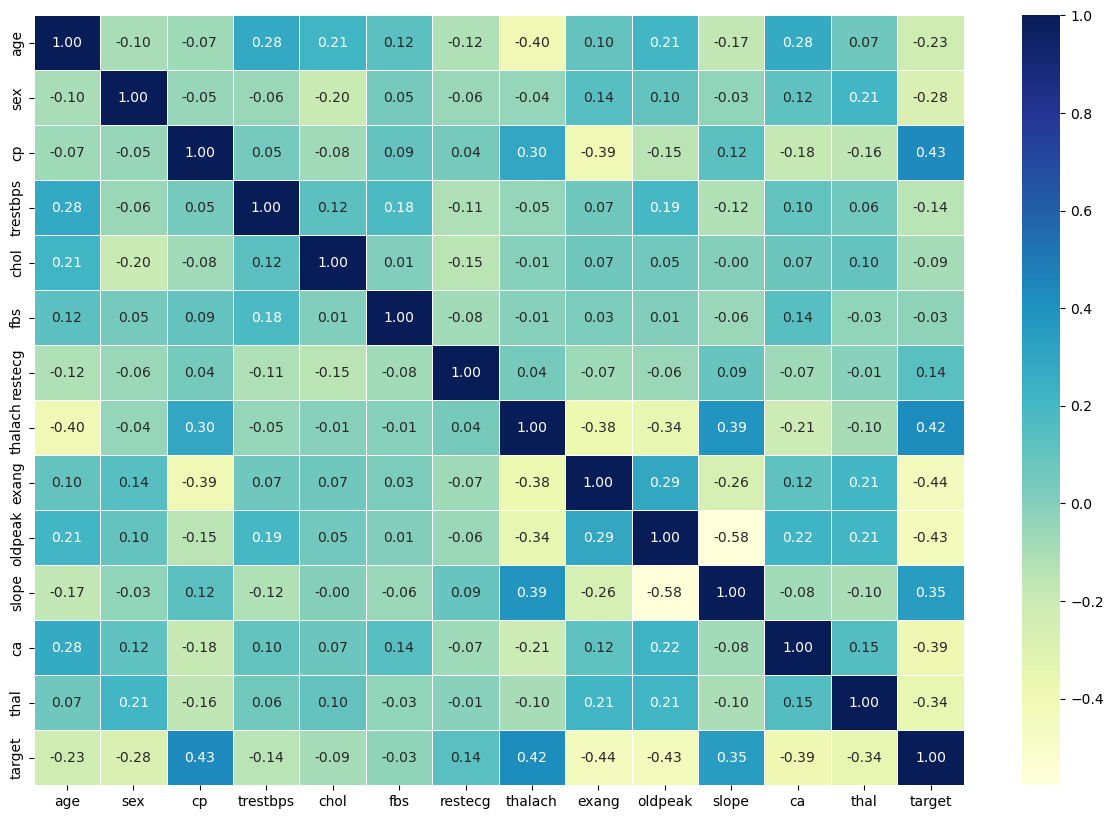

In [18]:
# Making correlation matrxi a little bit more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu")

## 5. Modelling

In [19]:
# Splitting data
x = df.drop('target', axis=1)
y = df.target

In [20]:
# Splitting data into train and test set
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

Machine learning models I am going to try - 
1. Logistic regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [21]:
# Putting all the models in a dictionary
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(), 
    'RandomForestClassifier': RandomForestClassifier()
}
# Creating a function to fit and score models 
def fit_score(models, x_train, x_test,y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models = a dict of sklearn machine learning model which user wants to evaluate
    """
    np.random.seed(42)
    # Making a dictionary to store model scores
    model_scores = {}
    # Looping through models
    for name, model in models.items():
        # Fitting the model in training data
        model.fit(x_train, y_train) 
        # Evaluating model
        model_scores[name] = model.score(x_test, y_test )

    return model_scores

In [22]:
model_scores = fit_score(models, x_train, x_test, y_train, y_test)
model_scores

/Users/harshchandrul/Desktop/Repositories/Tutorial/.conda/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

#### Comparing Models

<Axes: >

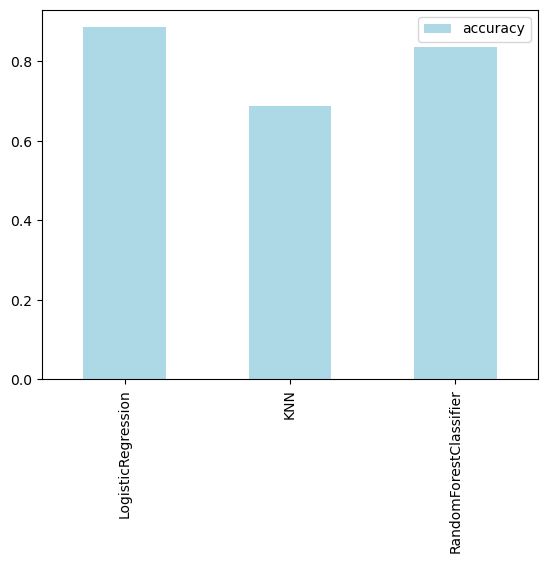

In [23]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='bar', color='lightblue')

Now I've got a baseline model but as we know, model's baseline/first predictions are not the best prediction it has to offer and it can always be Improved via Tuning.

Let's Look at the following - 
* HyperParameter Tuning
* Feature Importance 
* Confusion Matrix
* Cross-Validation 
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area Under The Curve (AUC)
### HyperParameter Tuning

In [24]:
# Lets Tune KNN
train_scores = []
test_scores = []
# Creating a list for different values for n_neighbours
neighbors = range(1, 20)
# Setting up KNN instance
knn = KNeighborsClassifier()
# Looping through different values of n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # Fitting  the model
    knn.fit(x_train, y_train)
    # Updating train scores 
    train_scores.append(knn.score(x_train, y_train))
    # Updating test scores 
    test_scores.append(knn.score(x_test, y_test))

In [25]:
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853])

Maximum Test Score: 75.41%


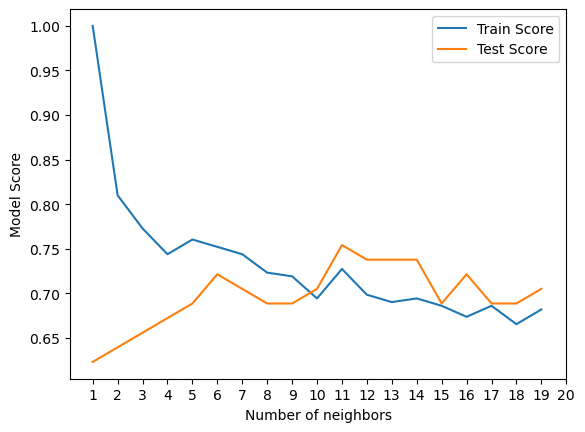

In [26]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f"Maximum Test Score: {max(test_scores)*100:.2f}%")

#### HyperParameter Tuning with RandomizedSearchCV
I'm going to tune 
1. LogisticRegression
2. RandomForestClassifier

In [27]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

In [28]:
# Tuning Logistic Regression
np.random.seed(42)
# Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)
# Fittin Random hyperparameter search model for logistic regression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [30]:
#  setup Random hyperparameter search for RandomForest
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [31]:
rs_rf.score(x_test, y_test)

0.8688524590163934

#### Tuning HyperParameters Using GridSearchCV

In [32]:
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

### Evaluating tuned machine learning model
* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision 
* Recall 
* F1 Score

In [35]:
# Making predictions with tuned model 
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

/Users/harshchandrul/Desktop/Repositories/Tutorial/.conda/lib/python3.12/site-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


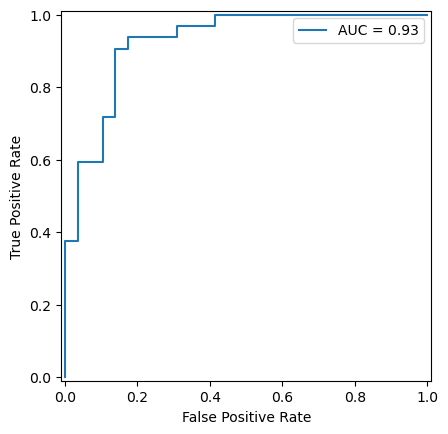

In [46]:
# Get Predicted Probabilities
y_probs = gs_log_reg.predict_proba(x_test)[:, 1]  # Probability for class 1
# Get fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Calculating AUC
auc_score = roc_auc_score(y_test, y_probs)
# Plot ROC Curve
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.legend([f'AUC = {auc_score:.2f}']);

In [47]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [48]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculaing various Evaluation metrics using cross-validation

In [51]:
cv_acc = np.mean(cross_val_score(gs_log_reg, x, y, scoring='accuracy', cv=10))
cv_precision = np.mean(cross_val_score(gs_log_reg, x, y, scoring='precision', cv=10))
cv_recall = np.mean(cross_val_score(gs_log_reg, x, y, scoring='recall', cv=10))
cv_f1 = np.mean(cross_val_score(gs_log_reg, x, y, scoring='f1', cv=10))
print(f"acc: {cv_acc}, pre: {cv_precision}, recall: {cv_recall}, f1: {cv_f1}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 

<Axes: title={'center': 'Cross validated metrics score'}>

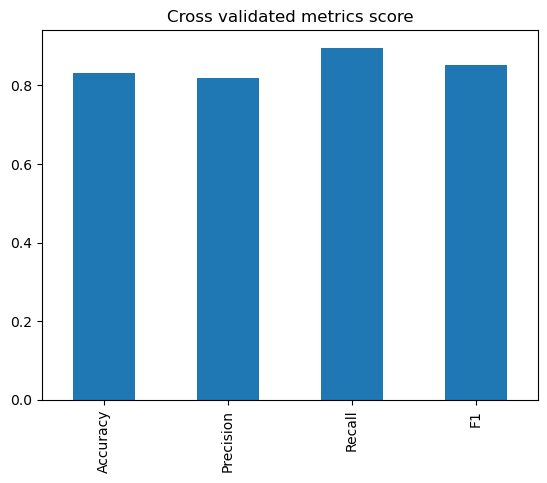

In [56]:
# Visualizing cross validated metrics 
cv_metrics = pd.DataFrame({
    'Accuracy': cv_acc,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1': cv_f1},
    index=[0])
cv_metrics.T.plot(kind='bar', legend=False,title='Cross validated metrics score')

### Feature Importance
Feature Importance is asking, "Which features contributed the most to the outcome of model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Finding feature importance of LogisticRegression.......

In [66]:
# Fit an instance of logistic regression
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [68]:
# checking coef_
clf.coef_

array([[ 0.00316728, -0.86044654,  0.66067039, -0.01156993, -0.00166374,
         0.04386106,  0.3127585 ,  0.02459361, -0.60413082, -0.56862801,
         0.45051629, -0.63609898, -0.67663371]])

In [71]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672803473471746),
 'sex': np.float64(-0.8604465397334717),
 'cp': np.float64(0.6606703933230701),
 'trestbps': np.float64(-0.011569932224142465),
 'chol': np.float64(-0.0016637439444753457),
 'fbs': np.float64(0.043861055458486765),
 'restecg': np.float64(0.31275849953638685),
 'thalach': np.float64(0.0245936131980898),
 'exang': np.float64(-0.604130820900716),
 'oldpeak': np.float64(-0.5686280121446481),
 'slope': np.float64(0.45051628712277775),
 'ca': np.float64(-0.6360989818014864),
 'thal': np.float64(-0.6766337106855729)}

<Axes: >

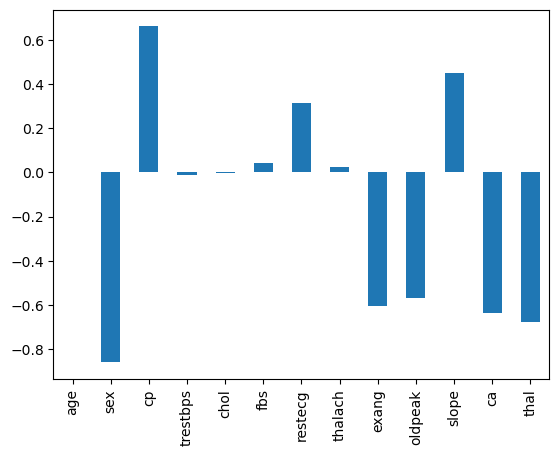

In [75]:
# Visualizing Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', legend=False)

In [76]:
# Negative relation between sex and target. As value of sex increases, target decreases (ratio-wise)
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [77]:
# Positive correlation between slope and target value
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
